In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in the data set
df = pd.read_csv('/Users/helenamabey/Stats_Spring_2025/Real_estate.csv')

In [4]:
df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Used ChatGPT to help update the given date format to a usable date format. Defined a function to capture a standard date as described
# in the initial data definition table in homework.
from datetime import datetime, timedelta

def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    start_of_year = datetime(year, 1, 1)
    days_in_year = (datetime(year + 1, 1, 1) - start_of_year).days
    actual_date = start_of_year + timedelta(days=remainder * days_in_year)
    return actual_date.strftime("%Y-%m-%d")

df['Transaction date'] = [decimal_year_to_date(d) for d in df['Transaction date']]

df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# Review the properties of each column. The date is not the correct data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   Transaction date                     414 non-null    object 
 2   House age                            414 non-null    float64
 3   Distance to the nearest MRT station  414 non-null    float64
 4   Number of convenience stores         414 non-null    int64  
 5   Latitude                             414 non-null    float64
 6   Longitude                            414 non-null    float64
 7   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 26.0+ KB


In [7]:
# Correct the Transaction date data type
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
# Confirmed the data type has been updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   No                                   414 non-null    int64         
 1   Transaction date                     414 non-null    datetime64[ns]
 2   House age                            414 non-null    float64       
 3   Distance to the nearest MRT station  414 non-null    float64       
 4   Number of convenience stores         414 non-null    int64         
 5   Latitude                             414 non-null    float64       
 6   Longitude                            414 non-null    float64       
 7   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 26.0 KB


In [9]:
# Obtain the summary statistics on the full data set
df.describe()

,No,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## House Age vs House Price of Unit Area: Question 2 #1

In [10]:
# Obtain the summary statistics on the requested comparison features, House age and House price of unit area
df[['House age','House price of unit area']].describe()

,House age,House price of unit area
count,414.000000,414.000000
mean,17.712560,37.980193
std,11.392485,13.606488
min,0.000000,7.600000
25%,9.025000,27.700000
50%,16.100000,38.450000
75%,28.150000,46.600000
max,43.800000,117.500000


In [14]:
# Compute correlation between age and price: This shows that while there is a negative correlation between the two
# features, it is very small. House prices do fall as the age of a house increases but it is not a strong factor.
correlation = df[['House age', 'House price of unit area']].corr()
correlation

,House age,House price of unit area
House age,1.000000,-0.210567
House price of unit area,-0.210567,1.000000


In [47]:
# House age skewness: This slightly right-skewed result is nearly 0 so the distribution appears to be relatively normal
df["House age"].skew()

0.38292623077299737

In [49]:
# House age Kurtosis: This shows that the distribution has a flatter peak than a normal distribution and possibly
# fewer outliers
df["House age"].kurt()

-0.8771201112290763

In [51]:
# House price Skewness: This result is more moderately right-skewed than age, showing there may be some higher 
# outliers causing the skew. 
df["House price of unit area"].skew()

0.5998525842660576

In [53]:
# House price Kurtosis: Because this result is higher than normal, the distribution is more sharply peaked with
# quite a few outliers.
df["House price of unit area"].kurt()

2.1790970477396163

In [55]:
# Used ChatGPT for a code to calculate p value and Pearson's correlation (same as correlation found above)
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
corr_value, p_value = pearsonr(df['House age'], df['House price of unit area'])

print(f"Pearson's correlation: {corr_value:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson's correlation: -0.211
P-value: 0.000


#### Both the mean and median are similar for House age and House price of unit area. This could show a normal distribution of the values. The correlation being a -0.210567 shows a very slight negative correlation between the age of houses in comparison to the price per unit. Older houses have a slightly lower price than newer homes. This confirmed with the Pearson's correlation. The P-value of 0.00 which is less than 0.05 also confirms that the house age does impact the price of unit area but again it shows the impact is very slight.

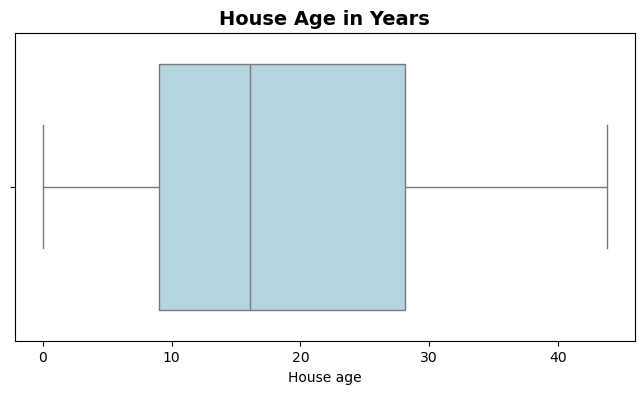

In [159]:
# Boxplot for Age: This confirms a slight right skew where the median value is further toward the lower values
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["House age"], color="lightblue")
plt.title("House Age in Years", fontsize=14, fontweight='bold')
plt.show()

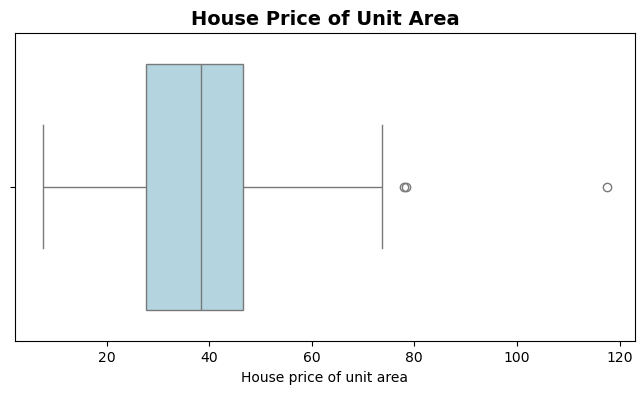

In [157]:
# Boxplot for Price: This confirms that there is a more defined right-skew with multiple large outliers on the far
# right. The skew is larger than for Age.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["House price of unit area"], color="lightblue")
plt.title("House Price of Unit Area", fontsize=14, fontweight='bold')
plt.show()

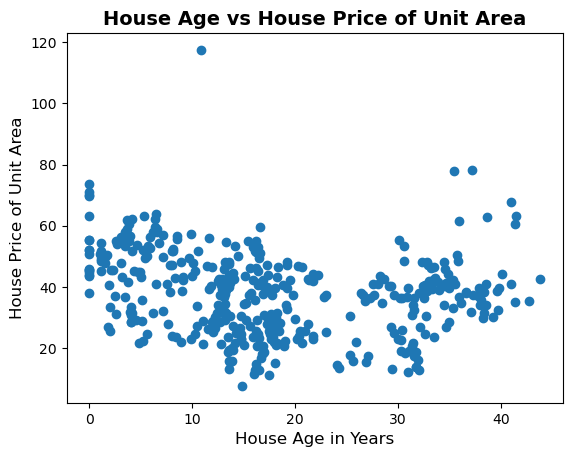

In [155]:
#Scatterplot House age vs House price of unit area: This shows that there may not be a strong relationship to age
# and price. There are a few outliers but generally the price results are similar regardless of house age.
plt.scatter(x=df['House age'], y=df['House price of unit area'])
plt.title('House Age vs House Price of Unit Area', fontsize=14, fontweight='bold')
plt.xlabel("House Age in Years", fontsize=12)
plt.ylabel("House Price of Unit Area", fontsize=12)
plt.show()

In [17]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
import seaborn as sns

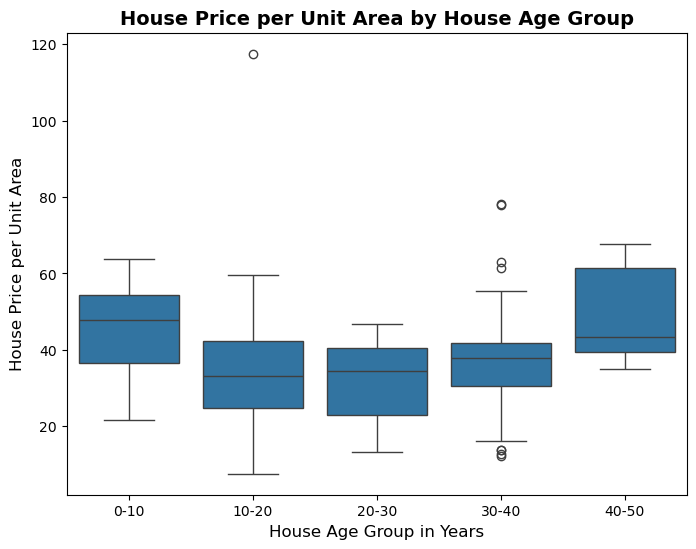

In [153]:
# Using a multiple boxplot, this compares the price per unit area and the house age: This also confirms the extreme outliers
# that may be impacting the normality of our data. It's interesting how once the homes are considerably older, the prices increase.
df['House age category'] = pd.cut(df['House age'], bins=[0,10,20,30,40,50], labels=['0-10','10-20','20-30','30-40','40-50'])

plt.figure(figsize=(8,6))
sns.boxplot(x='House age category', y='House price of unit area', data=df)
plt.xlabel("House Age Group in Years", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.title("House Price per Unit Area by House Age Group", fontsize=14, fontweight='bold')
plt.show()

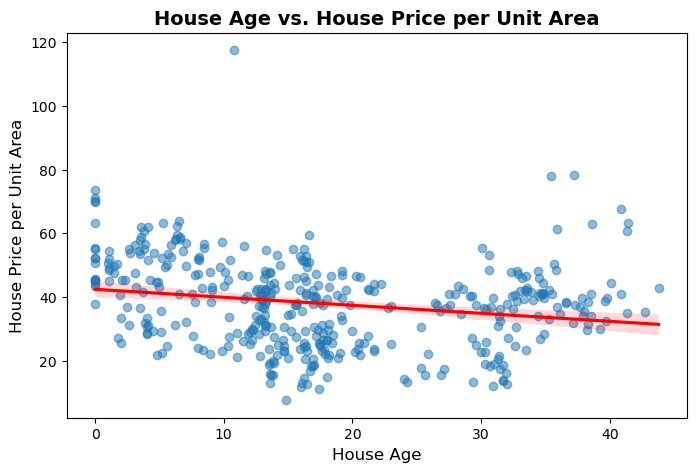

In [151]:
# Used ChatCPT and given python reference notebooks to assist with this regression plot: This shows the slight negative relationship between
# these two factors. This confirms the correlation results we previously reviewed that age has a minimal impact on price. The CI stays
# pretty thin meaning there is strong confidence in this trend even though there is only a slight impact on price based on age. 
plt.figure(figsize=(8, 5))
sns.regplot(x='House age', y='House price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}) 
plt.xlabel("House Age", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.title("House Age vs. House Price per Unit Area", fontsize=14, fontweight='bold')
plt.show()

## Distance to Nearest MRT Station vs House Price of Unit Area: Question 2 #2

In [64]:
# Obtain the summary statistics on the requested comparison features, Distince to nearest MRT station and price
df[['Distance to the nearest MRT station','House price of unit area']].describe()

,Distance to the nearest MRT station,House price of unit area
count,414.000000,414.000000
mean,1083.885689,37.980193
std,1262.109595,13.606488
min,23.382840,7.600000
25%,289.324800,27.700000
50%,492.231300,38.450000
75%,1454.279000,46.600000
max,6488.021000,117.500000


In [99]:
# Compute correlation between distance and price: These results show a relatively moderate negative correlation between
# these features. As the house price increases the distance decreases.
correlation_b = df[['Distance to the nearest MRT station', 'House price of unit area']].corr()
correlation_b

,Distance to the nearest MRT station,House price of unit area
Distance to the nearest MRT station,1.000000,-0.673613
House price of unit area,-0.673613,1.000000


In [68]:
# Distance Skewness: This results shows a pretty defined right-skew with many outliers on the right side. 
df["Distance to the nearest MRT station"].skew()

1.8887565801256048

In [70]:
# Distance Kurtosis: This value is very high implying the distribution has a high peak with many outliers and heavy
# tails
df["Distance to the nearest MRT station"].kurt()

3.20786836751181

In [72]:
# House price Skewness: This result is more moderately right-skewed than age, showing there may be some higher 
# outliers causing the skew.
df["House price of unit area"].skew()

0.5998525842660576

In [74]:
# House price Kurtosis: Because this result is higher than normal, the distribution is more sharply peaked with
# quite a few outliers.
df["House price of unit area"].kurt()

2.1790970477396163

In [111]:
# Used ChatGPT for a code to calculate p value and Pearson's correlation (same as correlation found above)
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
corr_value_b, p_value_b = pearsonr(df['Distance to the nearest MRT station'], df['House price of unit area'])

print(f"Pearson's correlation: {corr_value_b:.3f}")
print(f"P-value: {p_value_b:.3f}")

Pearson's correlation: -0.674
P-value: 0.000


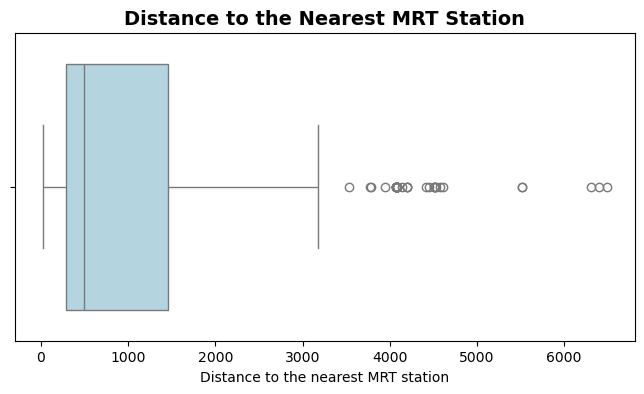

In [149]:
# Boxplot for Distance: This clearly shows the right-skew of the data with many outliers impacting the distribution.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Distance to the nearest MRT station"], color="lightblue")
plt.title("Distance to the Nearest MRT Station", fontsize=14, fontweight='bold')
plt.show()

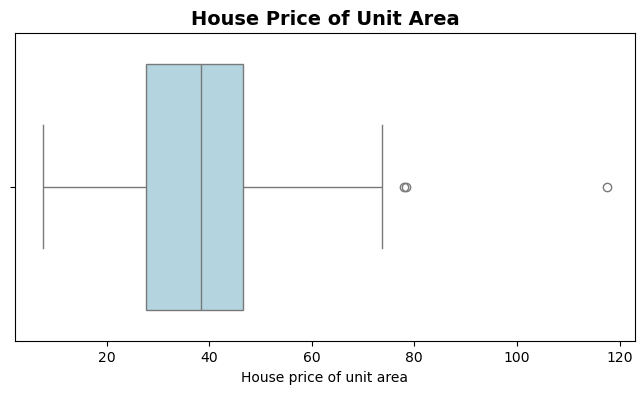

In [147]:
# Boxplot for Price: This confirms that there is a more defined right-skew with  multiple large outliers on the far
# right. This is much more moderately skewed than distance.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["House price of unit area"], color="lightblue")
plt.title("House Price of Unit Area", fontsize=14, fontweight='bold')
plt.show()

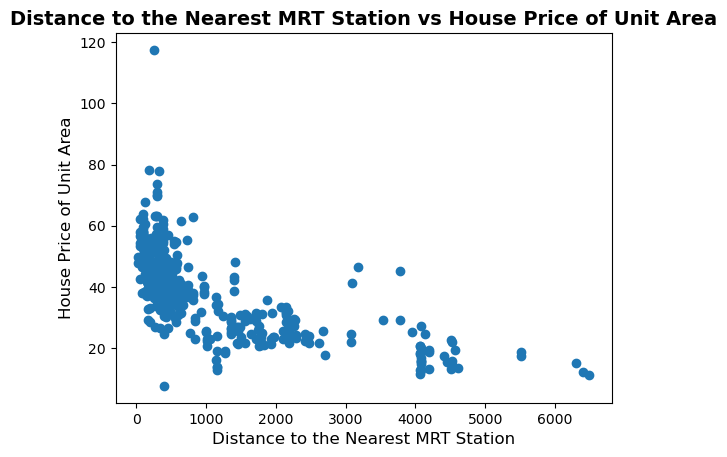

In [145]:
#Scatterplot Distance to the nearest MRT station vs House price of unit area: This shows a relatively strong negative
# relationship between distance and price. Where the distance is less, the price of homes appears to increase. 
plt.scatter(x=df['Distance to the nearest MRT station'], y=df['House price of unit area'])
plt.title('Distance to the Nearest MRT Station vs House Price of Unit Area', fontsize=14, fontweight='bold')
plt.xlabel("Distance to the Nearest MRT Station", fontsize=12)
plt.ylabel("House Price of Unit Area", fontsize=12)
plt.show()

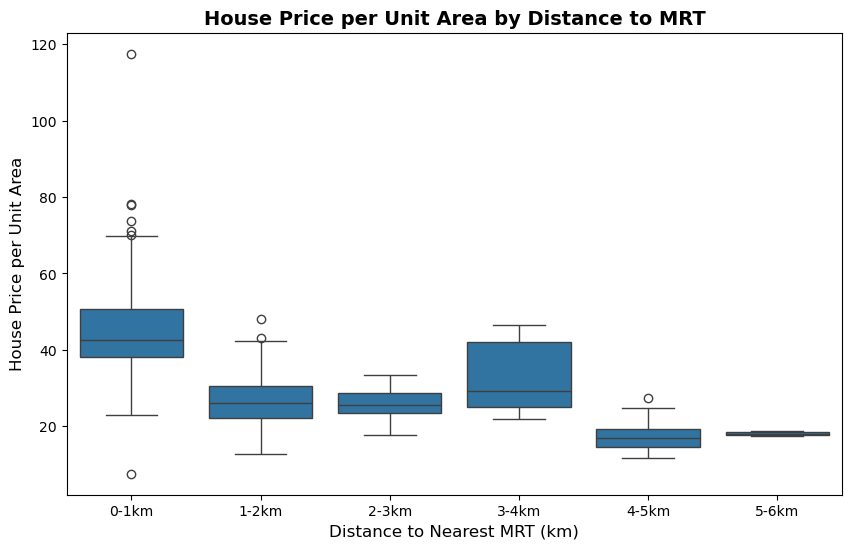

In [143]:
# Using a multiple boxplot, this compares the price per unit area and the distance to MRT: This first iteration is 
# challenging to analize because the outliers at the shorter distance are compressing the other results.
df['distance_category'] = pd.cut(df['Distance to the nearest MRT station'], 
                                 bins=[0, 1000, 2000, 3000, 4000, 5000, 6000], 
                                 labels=['0-1km', '1-2km', '2-3km', '3-4km', '4-5km', '5-6km'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='distance_category', y='House price of unit area', data=df)
plt.xlabel("Distance to Nearest MRT (km)", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.title("House Price per Unit Area by Distance to MRT", fontsize=14, fontweight='bold')
plt.show()

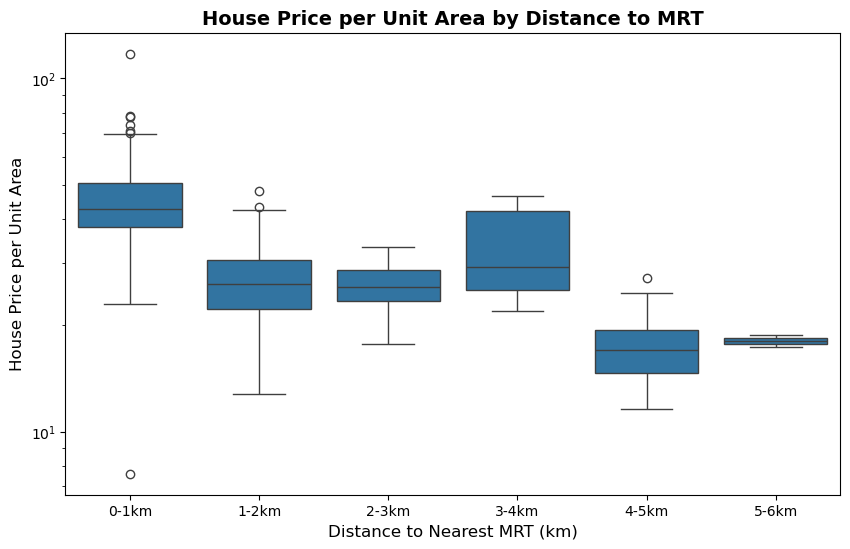

In [141]:
# Using a multiple boxplot, this compares the price per unit area and the distance to MRT: Tried a log transformation due to high 
# outliers compressing the lower values, scaling code provided by ChatGPT. This gives a bit more clarity between the distance groups.
# The negative regression pattern is slightly apparent as the distance increases.
df['distance_category'] = pd.cut(df['Distance to the nearest MRT station'], 
                                 bins=[0, 1000, 2000, 3000, 4000, 5000, 6000], 
                                 labels=['0-1km', '1-2km', '2-3km', '3-4km', '4-5km', '5-6km'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='distance_category', y='House price of unit area', data=df)
plt.yscale('log')  # Set log scale on y-axis
plt.xlabel("Distance to Nearest MRT (km)", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.title("House Price per Unit Area by Distance to MRT", fontsize=14, fontweight='bold')
plt.show()

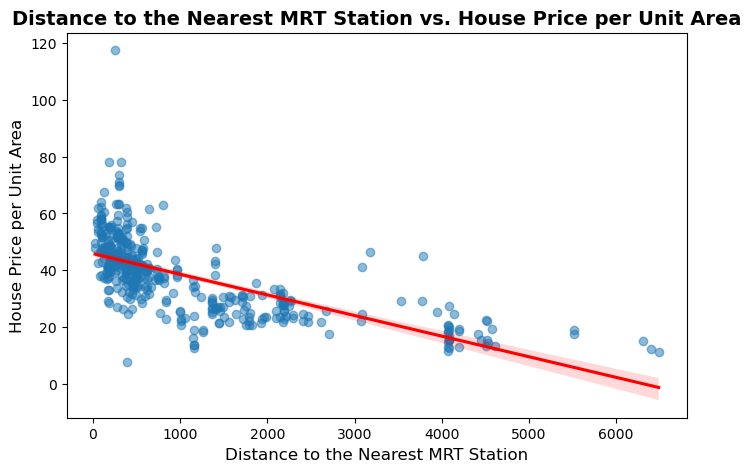

In [139]:
# Regression plot for price and distance to MRT station: Used ChatCPT and given python reference notebooks for this plot.
# The negative relationship is clearly defined which agrees with our previous analysis. Also the CI is very strong where the
# majority of the results are seen (shorter distance) but becomes less defined as the distance increases.
plt.figure(figsize=(8, 5))
sns.regplot(x='Distance to the nearest MRT station', y='House price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}) 
plt.xlabel("Distance to the Nearest MRT Station", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.title("Distance to the Nearest MRT Station vs. House Price per Unit Area", fontsize=14, fontweight='bold')
plt.show()

## Number of Convenience Stores vs House Price of Unit Area: Question 2 #3

In [95]:
# Obtain the summary statistics on the requested comparison features, Number of convenience stores and house price
df[['Number of convenience stores','House price of unit area']].describe()

,Number of convenience stores,House price of unit area
count,414.000000,414.000000
mean,4.094203,37.980193
std,2.945562,13.606488
min,0.000000,7.600000
25%,1.000000,27.700000
50%,4.000000,38.450000
75%,6.000000,46.600000
max,10.000000,117.500000


In [97]:
# Compute correlation between number of stores and price: The results show a moderate positive correlation between these
# features. 
correlation_c = df[['Number of convenience stores', 'House price of unit area']].corr()
correlation_c

,Number of convenience stores,House price of unit area
Number of convenience stores,1.000000,0.571005
House price of unit area,0.571005,1.000000


In [101]:
# Convenience Stores Skewness: This results shows a very slight right-skew but nearly normal. There may be a few outliers on
# the right.
df["Number of convenience stores"].skew()

0.15460656758377123

In [103]:
# Convenience Stores Kurtosis: This shows that there are flatter peaks and fewer extreme values in this
# distribution.
df["Number of convenience stores"].kurt()

-1.0657514990134194

In [105]:
# House price Skewness: This result is more moderately right-skewed than age, showing there may be some higher 
# outliers causing the skew.
df["House price of unit area"].skew()

0.5998525842660576

In [107]:
# House price Kurtosis: Because this result is higher than normal, the distribution is more sharply peaked with
# quite a few outliers.
df["House price of unit area"].kurt()

2.1790970477396163

In [113]:
# Used ChatGPT for a code to calculate p value and Pearson's correlation (same as correlation found above)
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
corr_value_c, p_value_c = pearsonr(df['Number of convenience stores'], df['House price of unit area'])

print(f"Pearson's correlation: {corr_value_c:.3f}")
print(f"P-value: {p_value_c:.3f}")

Pearson's correlation: 0.571
P-value: 0.000


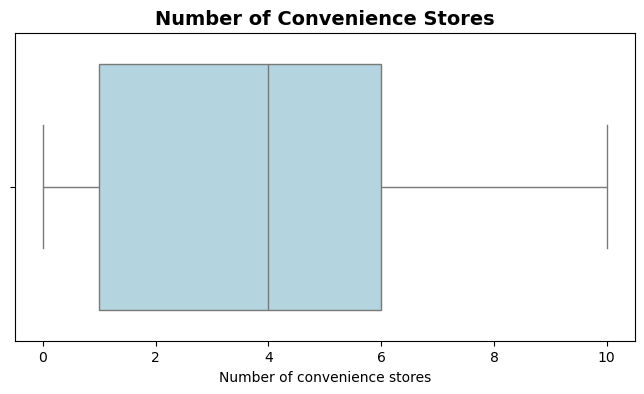

In [135]:
# Boxplot for Convenience Stores: This graph shows a very slight right-skew which confirms what we saw in the skewness value.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Number of convenience stores"], color="lightblue")
plt.title("Number of Convenience Stores", fontsize=14, fontweight='bold')
plt.show()

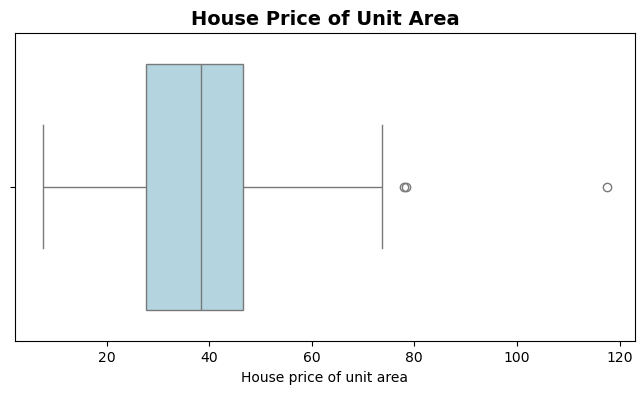

In [137]:
# Boxplot for Price: This confirms that there is a more defined right-skew with multiple large outliers on the far
# right. This is much more right-skewed than convenience stores.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["House price of unit area"], color="lightblue")
plt.title("House Price of Unit Area", fontsize=14, fontweight='bold')
plt.show()

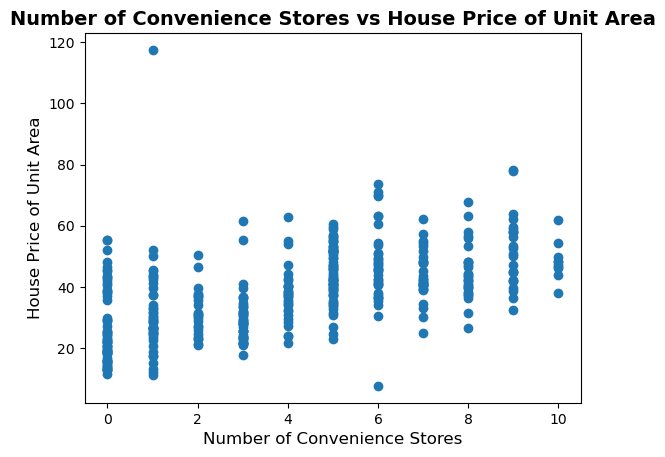

In [131]:
#Scatterplot Number of Convenience Stores vs House Price: There is a positive relationship between these factors. It
# shows that as the number of stores increases, the price of homes increases as well. There are a few outliers but they
# do not have a strong impact on the relationship. 
plt.scatter(x=df['Number of convenience stores'], y=df['House price of unit area'])
plt.title('Number of Convenience Stores vs House Price of Unit Area', fontsize=14, fontweight='bold')
plt.xlabel("Number of Convenience Stores", fontsize=12)
plt.ylabel("House Price of Unit Area", fontsize=12)
plt.show()

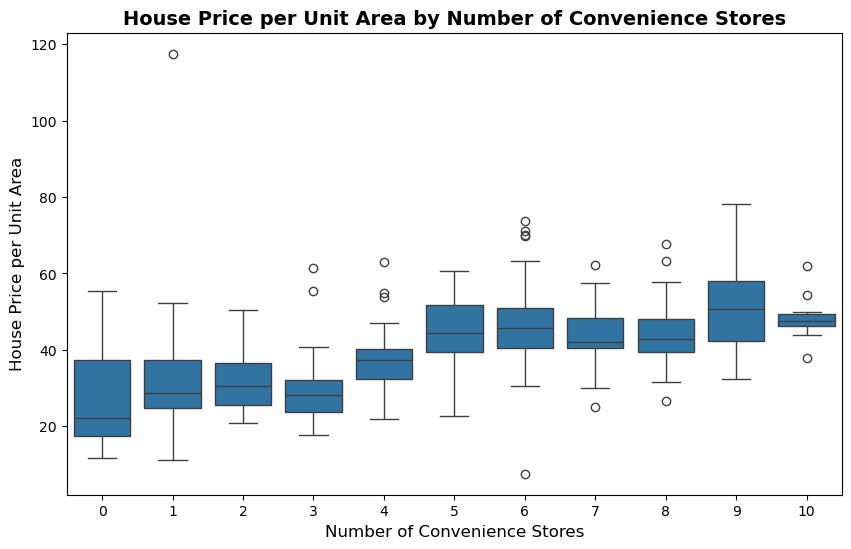

In [125]:
# Using a multiple boxplot, this compares the price per unit area and convenience stores: The positive relationship is
# apparent in this chart. The outliers are also visible within the groups.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of convenience stores', y='House price of unit area', data=df)

plt.xlabel("Number of Convenience Stores", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.title("House Price per Unit Area by Number of Convenience Stores", fontsize=14, fontweight='bold')
plt.show()

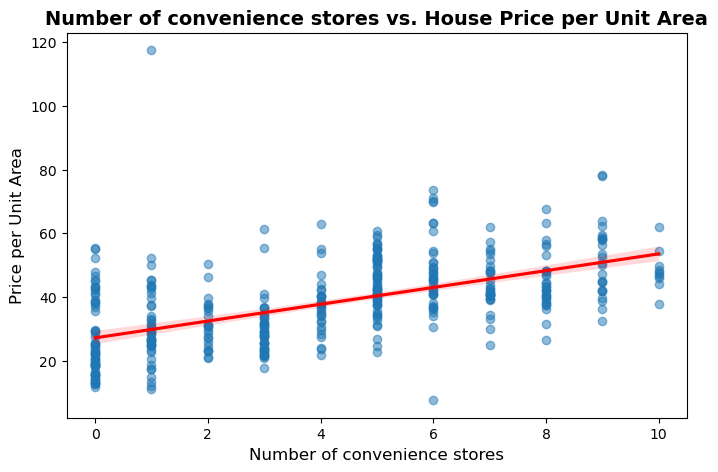

In [129]:
# Regression plot for price and convenience stores: Used ChatCPT and given python reference notebooks for this plot.
# The postive relationship is clearly defined which agrees with our previous analysis. Also the CI is very strong within the
# median number of stores where many of the points are located. 
plt.figure(figsize=(8, 5))
sns.regplot(x='Number of convenience stores', y='House price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}) 
plt.xlabel("Number of convenience stores", fontsize=12)
plt.ylabel("Price per Unit Area", fontsize=12)
plt.title("Number of convenience stores vs. House Price per Unit Area", fontsize=14, fontweight='bold')
plt.show()

## Simple Regression Model House Price vs Age of House: Question 2 #4

#### Utilized sample code provided in Lab 6 Simple Linear Regression

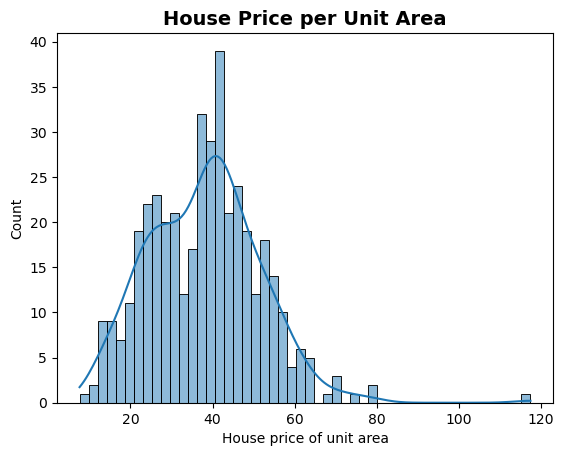

In [184]:
# Histogram for the house price which is the dependent variable
sns.histplot(data=df, x=df['House price of unit area'], kde=True, bins=50, element="bars")
plt.title("House Price per Unit Area", fontsize=14, fontweight='bold')
plt.show()

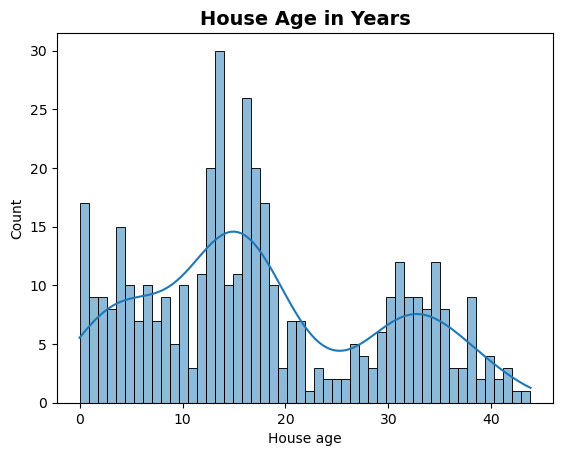

In [182]:
# Histogram for the house age which is the independent variable
sns.histplot(data=df, x=df['House age'], kde=True, bins=50, element="bars")
plt.title("House Age in Years", fontsize=14, fontweight='bold')
plt.show()

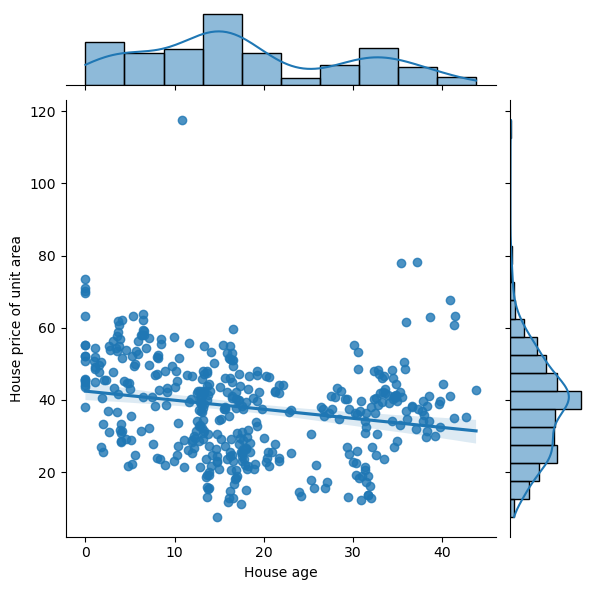

In [180]:
# Scatterplot showing the negative relationship between the two variables
sns.jointplot(x = 'House age', y = 'House price of unit area',data=df, kind='reg')
plt.show()

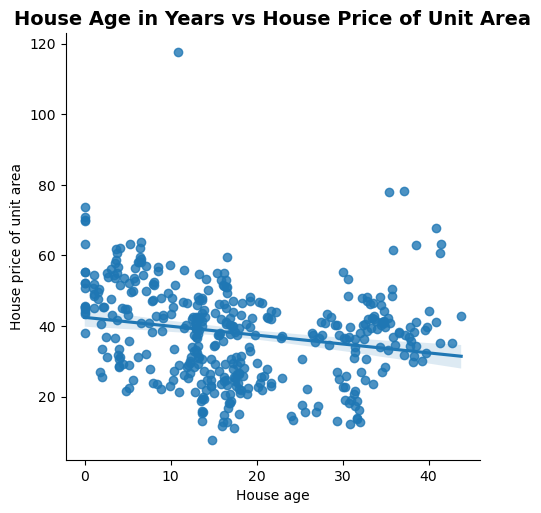

In [178]:
# Isolation of the scatterplot for the negative relationship between the two variables.
sns.lmplot(x = 'House age',y = "House price of unit area", data=df)
plt.title("House Age in Years vs House Price of Unit Area", fontsize=14, fontweight='bold')
plt.show()

In [186]:
# Define dependent variable
y = df['House price of unit area']

In [188]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

In [190]:
# Define independent variable
X = df[['House age']]

In [192]:
X

,House age
0,32.0
1,19.5
2,13.3
3,13.3
4,5.0
...,...
409,13.7
410,5.6
411,18.8
412,8.1


In [200]:
# Had to install scikit-Learn to use the model
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [202]:
from sklearn.model_selection import train_test_split #cross validation, avoid overfitting

In [204]:
# Define test and train variables. Assign test size to 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [208]:
# Confirm count of results in X_train
print(X_train)

     House age
287       19.2
31        29.6
209       34.8
239       18.1
47        35.9
..         ...
343       33.5
359        5.6
323       28.6
280        2.3
8         31.7

[289 rows x 1 columns]


In [210]:
# Confirm count of results in y_train
print(y_train)

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
       ... 
343    46.6
359    24.7
323    42.5
280    45.4
8      18.8
Name: House price of unit area, Length: 289, dtype: float64


In [212]:
# Confirm count of results in X_test
print(X_test)

     House age
121       13.6
353        4.1
96         6.4
43        34.4
125        1.1
..         ...
248       19.0
84        15.1
409       13.7
80        11.8
161       19.2

[125 rows x 1 columns]


In [214]:
# Confirm count of results in y_test
print(y_test)

121    48.0
353    31.3
96     59.5
43     34.1
125    48.6
       ... 
248    22.3
84     43.7
409    15.4
80     40.3
161    39.6
Name: House price of unit area, Length: 125, dtype: float64


In [216]:
# Import linear regression package from sklearn
from sklearn.linear_model import LinearRegression

In [218]:
# Define linear regression variable
LR = LinearRegression()

In [220]:
LR.fit(X_train,y_train) # only use training data to get intercept and slope

LinearRegression()

In [222]:
# Print intercept and slope obtained from training data
print('Regression Intercept:', LR.intercept_)
print('Regression Coefficients:',LR.coef_)

Regression Intercept: 42.57455942358807
Regression Coefficients: [-0.27024956]


In [224]:
# Define prediction variable for training
LR_Predictions_Train = LR.predict(X_train)

In [226]:
y_train

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
       ... 
343    46.6
359    24.7
323    42.5
280    45.4
8      18.8
Name: House price of unit area, Length: 289, dtype: float64

In [228]:
# Review train prediction data
LR_Predictions_Train

array([37.38576781, 34.57517236, 33.16987463, 37.68304233, 32.87260011,
       41.11521178, 40.81793726, 38.98024023, 40.16933831, 37.79114216,
       40.980087  , 40.46661283, 35.38592105, 41.73678578, 38.35866624,
       38.8180905 , 41.601661  , 38.1965165 , 37.98031685, 32.89962506,
       33.16987463, 38.27759137, 41.25033656, 37.89924198, 33.38607428,
       31.73755194, 33.81847358, 42.0340603 , 33.14284967, 41.70976082,
       38.03436676, 31.84565177, 39.43966449, 33.73739871, 31.41325247,
       38.1965165 , 36.7101439 , 37.22361807, 34.65624722, 38.89916537,
       42.16918508, 32.33210098, 36.03452   , 33.22392454, 37.81816711,
       42.57455942, 40.16933831, 38.11544163, 41.14223674, 32.98069993,
       38.00734181, 40.46661283, 32.14292629, 37.00741842, 41.30438648,
       42.57455942, 38.3856912 , 42.57455942, 33.89954845, 34.06169819,
       38.00734181, 38.08841668, 31.81862681, 40.65578753, 41.52058613,
       39.08834006, 36.7101439 , 41.46653621, 38.25056641, 33.57

In [230]:
# Define prediction variable for test
LR_Predictions_Test = LR.predict(X_test)

In [232]:
LR_Predictions= LR.predict(X)

In [234]:
# Review test prediction data
print(LR_Predictions)

[33.9265734  37.30469294 38.98024023 38.98024023 41.22331161 40.65578753
 33.2509495  37.08849329 34.00764827 37.73709224 33.16987463 40.87198718
 39.0613151  37.06146834 39.00726519 32.92665002 42.57455942 37.79114216
 38.00734181 42.16918508 41.35843639 39.73693901 38.60189085 39.84503884
 31.87267673 34.65624722 41.73678578 39.76396397 37.38576781 40.65578753
 35.57509574 34.57517236 32.33210098 38.11544163 38.41271615 38.8180905
 38.60189085 39.33156467 41.73678578 38.1965165  38.89916537 38.03436676
 32.8185502  33.27797445 41.8448856  32.68342541 36.7101439  32.87260011
 36.03452    34.62922227 36.7101439  34.1157481  33.89954845 38.98024023
 38.22354146 34.00764827 33.4941741  41.62868595 34.38599766 38.98024023
 39.60181423 41.14223674 37.92626694 41.87191056 37.84519207 31.73755194
 42.30430986 40.27743814 34.35897271 39.19643988 40.79091231 32.98069993
 33.79144862 38.84511545 40.73686239 39.2504898  32.87260011 37.03444338
 32.25102611 37.71006729 39.38561458 34.25087288 39.

In [236]:
# Capture R^2 values for test and training
print('R^2 for training set:', LR.score(X_train, y_train))
print('R^2 for test set:', LR.score(X_test, y_test))

R^2 for training set: 0.04799221706333745
R^2 for test set: 0.024370363655339844


In [238]:
# import dependencies
from sklearn import metrics

In [240]:
# Capture Root Mean Squared Error 
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, LR_Predictions_Train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, LR_Predictions_Test))
print('RMSE for training set:', RMSE_train)
print('RMSE for test set:', RMSE_test) # training and test errors similar

RMSE for training set: 13.921708475703896
RMSE for test set: 11.693813593030535


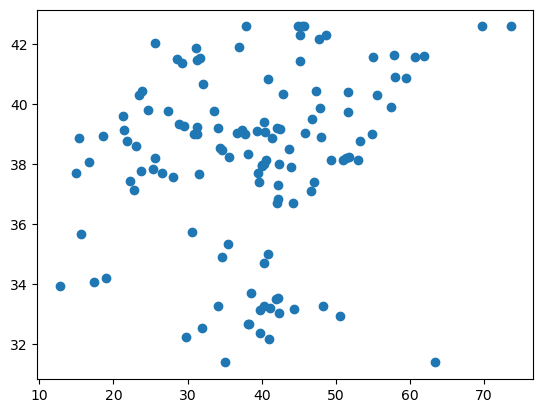

In [244]:
# Scatterplot for test data
plt.scatter(y_test,LR_Predictions_Test)
#plt.show()

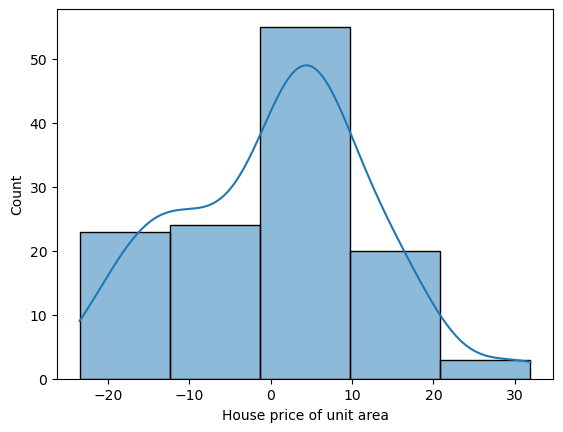

In [250]:
# Histogram for test data
sns.histplot(data=df, x=(y_test-LR_Predictions_Test), kde=True, bins=5, element="bars") # not normal dist
plt.show()

## Regression Function: Question 2 #5
### The best fitting line is Y = 42.58 - 0.27*X 
#### Regression Intercept: 42.57455942358807
#### Regression Coefficient (slope): [-0.27024956]

## Regression Model Comparison: Question 2 #10

### Single linear regression model results

In [263]:
# Asked ChatGPT to help with code to make a result similar to .summary() to capture OLS Regression Results for train and test sets

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Compute residuals
residuals_train = y_train - LR_Predictions_Train
residuals_test = y_test - LR_Predictions_Test

# R-squared
r2_train = r2_score(y_train, LR_Predictions_Train)
r2_test = r2_score(y_test, LR_Predictions_Test)

# Adjusted R-squared
n_train, k = X_train.shape
n_test = X_test.shape[0]

adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - k - 1))
adj_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - k - 1))

# Mean Squared Error & RMSE
mse_train = mean_squared_error(y_train, LR_Predictions_Train)
mse_test = mean_squared_error(y_test, LR_Predictions_Test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Add constant for statsmodels OLS summary
X_train_with_const = sm.add_constant(X_train)

# Run statsmodels OLS to get summary (for Training Data)
ols_model = sm.OLS(y_train, X_train_with_const).fit()
summary_table = ols_model.summary()

# Print key metrics for training & test sets
print("Scikit-learn Linear Regression Summary:")
print(f"Intercept: {LR.intercept_:.4f}")
print("Coefficients:")
print(pd.Series(LR.coef_, index=X_train.columns))  

print("Training Set Performance:")
print(f"R-squared: {r2_train:.4f}")
print(f"Adjusted R-squared: {adj_r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse1_train:.4f}")

print("Test Set Performance:")
print(f"R-squared: {r2_test:.4f}")
print(f"Adjusted R-squared: {adj_r2_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse1_test:.4f}")

# Display full statsmodels-style summary
print("Statsmodels OLS Summary (Training Data):")
print()
print(summary_table)

Scikit-learn Linear Regression Summary:
Intercept: 42.5746
Coefficients:
House age   -0.27025
dtype: float64
Training Set Performance:
R-squared: 0.0480
Adjusted R-squared: 0.0447
Mean Squared Error (MSE): 193.8140
Root Mean Squared Error (RMSE): 13.9217
Test Set Performance:
R-squared: 0.0244
Adjusted R-squared: 0.0164
Mean Squared Error (MSE): 136.7453
Root Mean Squared Error (RMSE): 11.6938
Statsmodels OLS Summary (Training Data):

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.045
Method:                       Least Squares   F-statistic:                     14.47
Date:                      Sun, 02 Mar 2025   Prob (F-statistic):           0.000174
Time:                              08:09:11   Log-Likelihood:                -1171.1
No. Observations:                       289   AIC: 

In [267]:
# Obtain P-value and T statistic for question 2 # 6
from scipy import stats

# Given values from the regression summary (example for House age)
beta_1 = -0.2702  # Slope coefficient
std_err = 0.071  # Standard error of slope
t_statistic = beta_1 / std_err  # Compute t-statistic
df = len(X_train) - 2  # Degrees of freedom (n - k - 1, where k=1 for simple regression)

# Compute p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.6f}")

T-statistic: -3.806
P-value: 0.000173


In [277]:
# Based on the previous lecture for 95% is +/- 1.968
from scipy.stats import t

# Degrees of freedom (n - 2)
df = len(X_train) - 2

# Find the critical t-value for a two-tailed test at alpha = 0.05
t_critical = t.ppf(1 - 0.025, df)

print(f"Critical t-value: ±{t_critical:.3f}")

Critical t-value: ±1.968
